# Smarte interaktive Skripte (smartiS)

[P. Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), J. Jeschonowski, L.P. Kamegne-Kamdem, N.B. Neathery und D.M. Weis

[Hochschule Hamm-Lippstadt](https://www.hshl.de), Marker Allee 76–78, D-59063 Hamm

## Inelastischer Stoß
- Geschwindigkeit nach einem inelastischen Stoß berechnen
- Spezialfall: Inelastischer Stoß zweier Körper mit gleicher Masse
- Knowledge Check(s)

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize
from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from IPython.display import Markdown, clear_output, display, HTML

In [2]:
javascript_funktion = {False: "hide()", True: "show()"}
schaltflaeche  = {False: "Quellcode anzeigen", True: "Quellcode verbergen"}


def quellcode_umschalten(state):

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_funktion[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))


def schaltflaeche_aktion(value):

    state = value.new
    quellcode_umschalten(state)
    value.owner.description = schaltflaeche[state]


state = False
quellcode_umschalten(state)

button = widgets.ToggleButton(state, description = schaltflaeche[state])
button.observe(schaltflaeche_aktion, "value")

display(button)

ToggleButton(value=False, description='Quellcode anzeigen')

## Geschwindigkeit nach einem inelastischen Stoß berechnen

Bei einem inelastischen Stoß wird ein Teil der kinetischen Energie durch eine irreversible Verformung in Wärmeenergie umgewandelt und steht daher nicht mehr als Bewegungsenergie zur Verfügung. Stellen Sie sich zwei Kugeln vor, die Sie mit einem Stück Knetgummi so präparieren, dass diese bei einem Zusammenstoß das Knetgummi deformieren. 


Im Gegensatz zu einem elastischen Stoß, bei dem die kinetische Energie beim Zusammenstoß kurzzeitig wie in einer Feder gespeichert wird, wird nun ein Teil der kinetischen Energie durch die Verformung in Wärme umgewandet und steht daher nicht mehr zur Verfügung, um die beiden Stoßpartner voneinander zu trennen. Bei einem inelastischen Stoß bleiben die beiden Stoßpartner daher miteinander verbunden und die beiden Massen haben nach dem Stoß eine gemeinsame Geschwindigkeit. Auch bei diesem (inelastischen) Stoß bleibt der **Impuls** erhalten, so dass wir folgende Gleichung aufstellen können:

$m_1 \cdot v_{1A}+m_2 \cdot v_{2A} = (m_1 + m_2) \cdot v_{E}$ (Impulserhaltung) <br>

Hierbei sind $v_{1A}$ und $v_{2A}$ die Geschwindigkeiten der beiden Massen $m_1$ und $m_2$ vor dem Stoß und $v_{E}$ ist die gemeinsame Geschwindigkeit der beiden Massen nach dem Stoß. 

Diese Gleichung können wir nach $v_{E}$ auflösen und erhalten:

$v_{E} = \frac{m_1 \cdot v_{1A}+m_2 \cdot v_{2A}}{(m_1 + m_2)}$ <br>

Mit den unten angebrachten Schiebereglern können Sie diese Gestzmäßigkeit gleich einmal ausprobieren.

In [3]:
def f(m1, m2, v1A, v2A):
    vE = ((m1*v1A)+(m2*v2A))/(m1+m2)
    print("Geschwindigkeit nach dem Stoss",vE)
    


interact(f, m1 = widgets.IntSlider(value=2, min=0, max=10, step=1), 
            m2 = widgets.IntSlider(value=4, min=0, max=10, step=1),
            v1A = widgets.IntSlider(value=1, min=-10, max=10, step=1),
            v2A = widgets.IntSlider(value=3, min=-10, max=10, step=1))


interactive(children=(IntSlider(value=2, description='m1', max=10), IntSlider(value=4, description='m2', max=1…

<function __main__.f(m1, m2, v1A, v2A)>

### Spezialfall: Inelastischer Stoß zweier Körper mit gleicher Masse

Für den Spezialfall gleicher Massen ($m_1=m_2=m$) vereinfacht sich die obige Gleichungen zu:

$v_{E} = \frac{m \cdot v_{1A}+m \cdot v_{2A}}{2 \cdot m}= \frac{(v_{1A} + v_{2A})}{2} $ <br>


<br> 
Abbildung 1 illustriert diesen Fall, bei der die Kugel mit der Masse $m$ (schwarz) und die sich mit der Geschwindigkeit $v$ bewegt, auf die ruhende Kugel (rot) der gleichen Masse $m$ (rot) trifft. Nach dem inelastischen Stoß haften beide Massen aneinander und bewegen sich mit der gleichen Geschwindigkeit $v/2$. <br> <br>


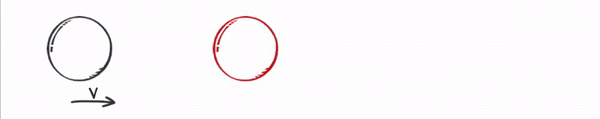


<p style="text-align: center;">Abbildung 1: Eine Kugel mit der Geschwindigkeit $v$ stößt inelastisch auf eine andere ruhende Kugel der gleichen Masse</p>



## Knowledge Check(s)
### Zwei Kugeln treffen eleastisch aufeinander

Eine Kugel der Masse $m_1=4\,\text{kg}$ trifft inelastisch mit einer Geschwindigkeit von $v_{1A}=5\,\text{m/s}$ auf eine zweite Kugel der Masse $m_2=7\,\text{kg}$, die sich mit einer Geschwindigkeit von von $v_{2A}=2\,\text{m/s}$ in die gleiche Richtung bewegt. Berechnen Sie die Geschwindigkeiten $v_{E}$ und überprüfen Sie Ihr Ergebnis durch Einstellen der Schieberegler. 

### Zwei Billiardkugeln

Beim Billiardspielen treffen Sie mit der weißen Billiardkugel auf die (ruhende) schwarze Billiardkugel. Beide Kugeln haben die gleiche Masse. Die Billiardkugeln präparieren Sie so mit einem Stück Knetgummi, dass diese nach dem Stoß aneinander haften bleiben. Was beobachten Sie (die Rotationsenergie der Kugeln wollen wir hier vernachlässigen)?

### Ein Gepäckstück auffangen
Ihr Freund sitz ruhig in einem Ruderboot, das keine Fahrt durchs Wasser macht ($v=0$) und das sich in der Nähe eines Steges befindet. Ihr Freund hat seinen Rucksack der Masse $m_{RU}=10\,\text{kg}$ vergessen, den Sie ihm daher mit der Geschwindigkeit $v_{RU}=5\,\text{m/s}$ vom Steg aus zuwerfen und den Ihr Freund sicher auffangen kann. <br>
(a) Wie würden Sie einen solchen Vorgang physikalisch modellieren?<br>
(b) Wie schnell bewegt sich das Ruderboot der Masse $m_{RB}=28\,\text{kg}$, nachdem Ihr Freund mit der Masse $m_F=75\,\text{kg}$ den Rucksack aufgefangen hat.

Oktober 2020 (CC BY-SA 4.0)